# Custom Regression Models: Implementation and Validation

## Imports

In [64]:
from orca.debug import println

from linear_regression import *
import logistic_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Linear Regression: Implementation Check & Evaluation

In [65]:
## Create Data
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)
print(X[:5])
print(y[:5])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])


[[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]
 [-0.10325476 -0.82849702  1.48986344 -1.64318881 -1.60090398]
 [-2.06340315  0.50325206 -0.64557207 -0.31735049 -1.66108342]]
[ 70.77131405 -51.6042361  -37.00044751 -83.53509879 -83.4003936 ]
[[ 2.13685019  0.59941972  0.48200818 -1.17746225  0.42508706]
 [-0.83985275 -0.64738798 -0.18442975 -0.52167138  1.35320121]
 [ 1.11477879 -0.79673013 -0.75423247 -0.01167004 -0.2934164 ]
 [-0.11443599 -0.8290456   1.49047543 -1.69580607 -1.5394634 ]
 [-2.15761518  0.49631793 -0.64769876 -0.35432727 -1.59796198]]


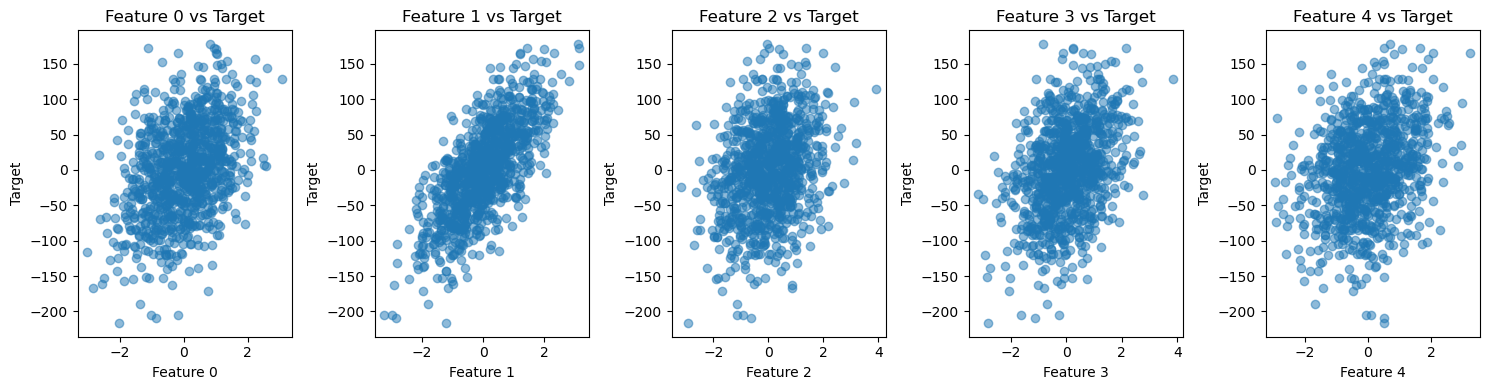

In [66]:
## Features vd Target

n_features = X.shape[1]

plt.figure(figsize=(15, 4))  # wide figure to fit multiple plots
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

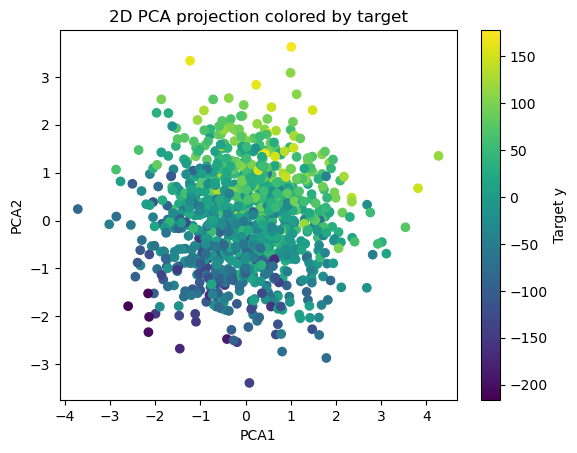

In [67]:
## Data Visulazation
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target y')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D PCA projection colored by target")
plt.show()

In [68]:
## Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
model = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

print(model.weights)
print(model.bias)


[-54.84779673 -64.70806078  50.87023664 -17.47805232  61.63733648]
[-49.53925994 -58.2262595   47.17114352  -4.06344173  56.86464899]
[26.76249667 46.10526374 16.64354798 24.24137905 19.69659134]
0.21756875987457952


In [70]:
mse,rmse = model.evaluate(X_test, y_test)

baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = np.sum((y_test - baseline_pred) ** 2) / (2 * y_test.shape[0])
print("Baseline MSE:", baseline_mse)
print("Model MSE:", mse)



baseline_pred = np.full_like(y_test, y_train.mean())
rmse_baseline = np.sqrt(np.mean((y_test - baseline_pred) ** 2))
print("\nBaseline RMSE:", rmse_baseline)
print("Model RMSE:", rmse)
print("\n")
print(y_test.min(), y_test.max())


Baseline MSE: 1916.3354408717091
Model MSE: 55.4834145459985

Baseline RMSE: 61.9085687263356
Model RMSE: 10.534079413598372


-160.93098618080046 164.98841076787684


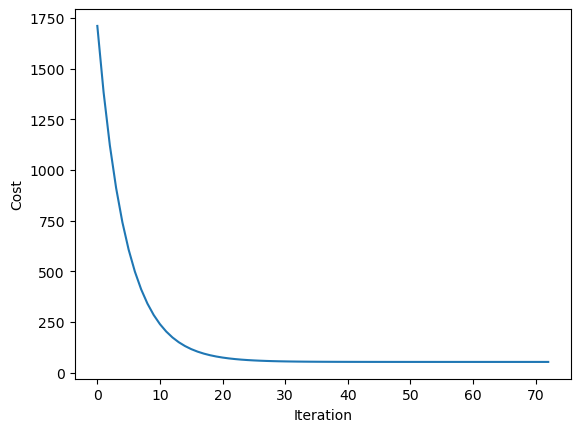

In [71]:
plt.plot(model.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

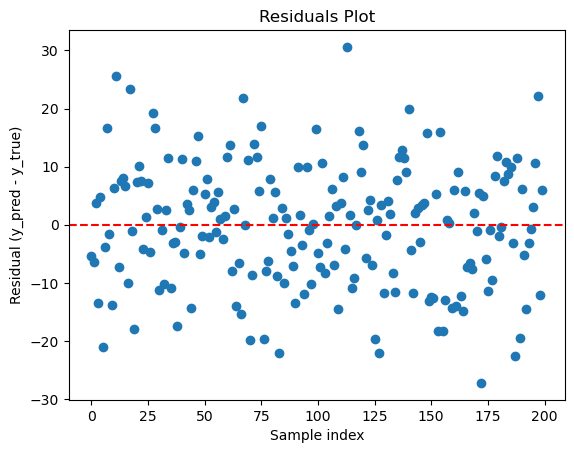

In [72]:
plt.scatter(range(len(y_test)), y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Sample index")
plt.ylabel("Residual (y_pred - y_true)")
plt.title("Residuals Plot")
plt.show()

### Effect of Noise on Linear Regression

Linear regression performs well when the features have a clear linear pattern with the target. With low noise, the model can capture this pattern, achieving lower MSE and RMSE than a simple baseline predicting the mean. However, as noise increases, random variation dominates, making it hard for the model to learn meaningful patterns. In very noisy datasets, the baseline may perform as well as or even better than the regression model.

## Linear Regression: With vs Without L2 Regularization

## Custom Linear Regression vs Scikit-Learn